Replacement of the tails
==========================

Definitions
---------------

Let us consider a Green function G (or a self) or in 
general a function G(z) on the complex plane with a 
spectral representation 
$$ G(z) = \int d \epsilon \frac{\rho(\epsilon)}{z-\epsilon}$$

We assume (it is true in general) that $\rho$ has a compact support,
so in particular that there is a tail, i.e.
a series at $z=\infty$ with a finite radius of convergence $R_\infty$.

$$ G(z) \mathop{\sim}_{z \rightarrow \infty} \sum_{n\geq 0} \frac{a_n}{z^n}$$

and for $z > R_\infty$, when truncated at order $N$, 

$$ G(z) = \sum_{n= 0}^{N-1}\frac{a_n}{z^n} + O\left( \dfrac{R_\infty}{|z|} \right)^{N} $$

Points at the end of the mesh
---------------------------------

Let us now consider $R > R_\infty$, 
and the points (we will adjust them to the Matsubara grid later)

$$ \omega_k = R \alpha_k  \qquad \text { for } 0 \leq k < N$$

Since $R > R_\infty$, we have

$$ G(\omega_k) = \sum_{n= 0}^{N-1}  \frac{a_n}{R^n \alpha_k^n} + O\left( \dfrac{R_\infty}{R} \right)^{N} $$

If we choose $R_\infty/ R$ small enough or $N$ large enough, 
we have at precision $\epsilon \approx O\left( \dfrac{R_\infty}{R} \right)^{N} $

$$ G_k \equiv = G(\omega_k) = \sum_{n= 0}^{N-1}  \frac{a_n}{R^n \alpha_k^n} $$

Let us introduce the Vandermonde matrix $$V_{ij} = \alpha_i^j $$
then we have

$$ G_k = V_{kn} A_n $$ with $A_n = \frac{a_n}{R^n}$.


Conditioning of the Vandermonde Matrix
--------------------------------------

It is known that the conditioning of $V$ can quickly becomes very bad.

* If $\alpha_k$ are on the unit circle in the complex plane, 
  the matrix $V$ is unitary (it is a discrete Fourier Transform).
  
* If we insist that $\alpha_k$ are real, we have to minimize the 
  condition number of $V$.
  

N=4
--------

* R is the maximum matsubara freq
* $\alpha = [-1, -0.9, 0.9, 1]$

Conditioning of $V$ is approx 20.

I propose to simply take : 

* a regular, *linearly spaced mesh* from -R to R.

* By convention, we assume that the function between 0.9 R and R
  (R = Omega_max) is well approximated by its tail to the *fourth* order
  to a precision $\epsilon$.

* We simply use the points at $\pm 0.9R, \pm R$ (adjusted to the matsubara grid).
  (the exact $V$ matrix depends on beta, adjusted to the matsubara mesh)
  and extract the tail coefs from these four points.
  
Note that :

* We can easily provide a self-consistency check : that the function is well 
  fit by the tail on [0.9R, R].
  
* The backward compatibility is trivial : no change.

  We just enforce that the tail fit works in this window and use  
  it to extract the tail.
  
  
N = 6, 8
-----------

It is possible to go beyond this, and use order 6 or 8.
To do this, we need to add additionnal points, e.g. 
for N = 8 :

* R is the maximum matsubara freq
* $\alpha = [-3.8, -1.4, -1, -0.9, 0.9, 1, 1.4, 3.8]$

Conditioning is 170, still manageable.
This means that any error on $G$ will be amplified on $A$ by 170 at max.
The effect on the evaluation of the tail is small, at most 2 digits.

However the order of the tail is much higher, so the tail fits the function
much better, cf test below.

The trade of is that the mesh is a bit more complex, 
but the window can be chosen much smaller, hence saving memory, e.g.
for $G(k, i\omega_n)$.

I propose to use this only optionally if needed.


Enforcing $a_0=0, a_1 = 1$ for a normal Green function
-----------------------------------------------------

To be discussed. It not very clear we need to enforce
this if we know it.


Advantages
-------------
  
The big technical advantage is that we store the value of $G$ at some points on the grid,
and *on Matsubara points*. We have that : 

* A loop over all mesh points will also compute $G_\omega$, hence also the tails !
  It solves our API headaches.

* Any linear operation is equivalent to the same on the tail.

* A multiplication of Green function is just ... a multiplication.

* There is no need to store a tail separately, it is in the mesh.

* But we still automatically compute it e.g. in a self-consistency condition.

* After a QMC, we simply leave these points to 0 or 1/\omega

Drawbacks
------------

-  What is left ?



Optimization of $\alpha$
---------------------------

In [2]:
import numpy as np
from scipy.optimize import minimize
def cond(c): 
    a = np.vander([1.0/x for x in c] + [-1.0/x for x in c], increasing = True)
    return np.linalg.cond(a)
def SVD(c): 
    a = np.vander([1.0/x for x in c] + [-1.0/x for x in c], increasing = True)
    return np.linalg.svd(a)
x0= [1, 1.1,1.3,2]
minimize(cond, x0,  options={'xtol': 1e-8, 'disp': True})

         Current function value: 171.918812
         Iterations: 27
         Function evaluations: 780
         Gradient evaluations: 128


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: OptimizeWarning: Unknown solver options: xtol
  # Remove the CWD from sys.path while we load stuff.


      fun: 171.91881210444492
 hess_inv: array([[  7.34507544e-06,  -6.73254246e-06,  -6.74743478e-06,
          1.85490787e-06],
       [ -6.73254246e-06,   7.94576581e-06,   8.29367750e-06,
          8.34206513e-07],
       [ -6.74743478e-06,   8.29367750e-06,   8.71567823e-06,
          1.32292514e-06],
       [  1.85490787e-06,   8.34206513e-07,   1.32292514e-06,
          4.10956353e-06]])
      jac: array([  2.67028809e-05,   1.20162964e-04,  -9.53674316e-06,
         7.24792480e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 780
      nit: 27
     njev: 128
   status: 2
  success: False
        x: array([ 0.89684884,  1.00182152,  1.39295827,  3.82460587])

In [146]:
cond([0.75, 0.8, 1])

231.80921466086585

In [151]:
cons = {'type' : 'ineq', 'fun' : lambda x : 1- x[0] ,}
minimize(lambda x : cond([0.75, x, 1]), [0.8], constraints = cons, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 171.247384363
            Iterations: 7
            Function evaluations: 22
            Gradient evaluations: 7


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: OptimizeWarning: Unknown solver options: xtol
  


     fun: 171.24738436310182
     jac: array([-0.0073299408])
 message: 'Optimization terminated successfully.'
    nfev: 22
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.8526464598])

In [156]:
cons = ( {'type' : 'ineq', 'fun' : lambda x : 1 - x[0]},
        {'type' : 'ineq', 'fun' : lambda x : 1 - x[1]}, 
        {'type' : 'ineq', 'fun' : lambda x : x[0] - 0.8}, 
        {'type' : 'ineq', 'fun' : lambda x : x[1] - 0.8} )
        
minimize(lambda x : cond([x[0], x[1], 1]), [0.7,0.8], constraints = cons, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 242.371557814
            Iterations: 8
            Function evaluations: 37
            Gradient evaluations: 8


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xtol
  


     fun: 242.37155781377294
     jac: array([ 2041.4005870819,    -0.0092887878])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.8         ,  0.8864694216])

In [263]:
cons = ( {'type' : 'ineq', 'fun' : lambda x : 1 - x[0]},
        {'type' : 'ineq', 'fun' : lambda x : 1 - x[1]}, 
        {'type' : 'ineq', 'fun' : lambda x : 1 - x[2]}, 
        {'type' : 'ineq', 'fun' : lambda x : x[0] - 0.5}, 
        {'type' : 'ineq', 'fun' : lambda x : x[1] - 0.5}, 
        {'type' : 'ineq', 'fun' : lambda x : x[2] - 0.5} )
        
minimize(lambda x : cond([x[0], x[1], x[2], 0.9, 1]), [0.6,0.8, 0.85], constraints = cons, options={'xtol': 1e-8, 'disp': True})

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 237308.321281
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xtol
  


     fun: 237308.32128136494
     jac: array([-2481325.73046875 ,  4048788.662109375,  2868824.62109375 ])
 message: 'Positive directional derivative for linesearch'
    nfev: 5
     nit: 5
    njev: 1
  status: 8
 success: False
       x: array([ 0.6 ,  0.8 ,  0.85])

In [257]:
M, N = 0.7, 5
minimize(lambda x : cond(x), np.linspace(M, 1, N), bounds = N*[(M,1)], options={'disp': True})

      fun: 60687.29905653873
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-208845.800079870969,  527817.694091936573,  520550.979126710445,
       -424638.586264336482, -620691.140647977591])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 1
   status: 0
  success: True
        x: array([ 0.7  ,  0.775,  0.85 ,  0.925,  1.   ])

A little test function
----------------------------

* We compute a function f (2 lorentzians)
* From that, we use the inverse of $V$ to compute $A$
* We compare the evaluation of the tail to the true value of the function

NB : it is better at higher order.


In [2]:
import numpy as np
from cmath import exp, pi

def f(w) : return 1/(w+2.0) + 2/(w + 3.2)

# Value of the maximum Matsubara
R = 3.2 * 3
np.set_printoptions(suppress=True, precision=12)

# uncomment here the chosen order
c = [1, 0.9] 
#c = [1, 1.2, 3.0]
c = [0.8, 0.88, 1]
#c = [1, 0.9, 1.4, 3.8]
c = [1, 0.9, 0.75, 0.8]
c = [ 0.75, 0.77260765 , 0.84615594 , 0.94935056 , 1.        ]

a = np.vander( [1.0/x for x in c] + [-1.0/x for x in c], increasing = True)
print "Condition", np.linalg.cond(a)
ai = np.linalg.inv(a)

tail_pts = np.array([ R*x for x in c] + [-R*x for x in c])

G = f(tail_pts)

# inverse Fourier Transform
A = np.matmul(ai, G)

def analytic_coef(n):
    n = n-1
    return (-3.2)**n*2 + (-2)**n

print "Coef analytic  :", np.array([((-3.2)**n*2 + (-2)**n) / R**(n+1) for n in range(2*len(c)-1)])
print "Coef from tail :", A #np.array([x.real for n,x in enumerate (A)])
#print "Coef analytic  :", np.array([(-3.2)**n*2 + (-2)**n for n in range(2*len(c)-1)])
#print "Coef from tail :", np.array([x.real*R**(n) for n,x in enumerate (A)])
print "Coef analytic   / tail"
for n in range(2*len(c)-1):
    print ((-3.2)**n*2 + (-2)**n) / R**(n+1)/  A[n+1]

# Comparing 
def f2(w):
    return sum( x * (R/w)**i for i,x in enumerate(A))

for w in np.arange(0.9*R, R , R/100.0):
    print np.array([w, abs(f2(w)/f(w) -1), abs(f2(w) - f(w)) ])#,  f2(w).real, f(w)])



Condition 59137.4082429
Coef analytic  : [ 0.3125         -0.091145833333  0.027669270833 -0.008657949942
  0.002768245744 -0.000898219921  0.000294296503 -0.000097034222
  0.000032122947]
Coef from tail : [-0.000114098526  0.312537972141 -0.090727565712  0.027530074906
 -0.009254292511  0.002966694519 -0.000491098041  0.000158826543
 -0.000223970618  0.000074353851]
Coef analytic   / tail
0.999878503913
1.00461014927
1.00505614052
0.935560436572
0.933107782416
1.82900326449
1.85294282613
0.433245320447
0.432028012301
[ 8.64            0.000000078133  0.000000020541]
[ 8.736           0.000000071257  0.000000018577]
[ 8.832           0.000000058082  0.000000015017]
[ 8.928           0.000000040149  0.000000010295]
[ 9.024           0.000000019521  0.000000004965]
[ 9.12            0.000000001303  0.000000000329]
[ 9.216           0.000000019463  0.00000000487 ]
[ 9.312           0.000000031822  0.0000000079  ]
[ 9.408           0.000000035037  0.000000008629]
[ 9.504           0.000000

In [255]:
c = [1, 0.9, 0.75, 0.8, 0.85, 0.95]
#c = [1, 0.925, 0.85, 0.7, 0.775]
#c = [1,  0.9]
#c = [1, 0.900001, 0.9]


def SVD(c): 
    #a = np.vander([1.0/x for x in c] , increasing = True)
    a = np.vander([1.0/x for x in c] + [-1.0/x for x in c], increasing = True)
    return np.linalg.cond(a), np.linalg.svd(a)[1]

SVD(c)

(2207916.5727874641,
 array([ 47.990341288905,  37.076911820325,   5.30793229072 ,
          4.697696451217,   0.718879767941,   0.638866280543,
          0.046855614822,   0.041624318302,   0.001619585055,
          0.001448913071,   0.000024072542,   0.000021735577]))

analytic 0.999999982143
analytic 1.00000080649
analytic 1.00000088083
analytic 0.999995894128
analytic 0.999995974736


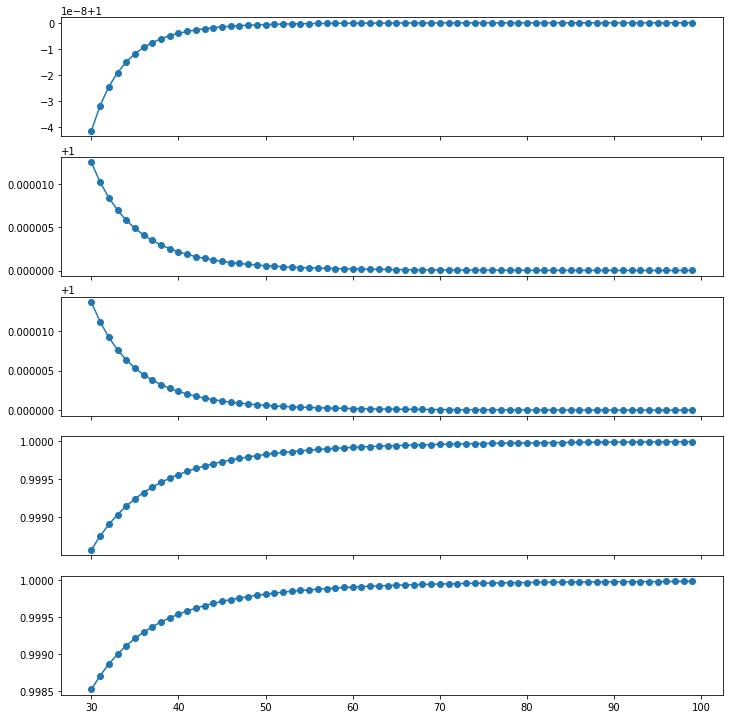

In [3]:
import numpy as np
from cmath import exp, pi
from matplotlib import pyplot as plt
%matplotlib inline

def f(w) : return 1/(w+2.0) + 2/(w + 3.2)

# Value of the maximum Matsubara
R = 30.0
np.set_printoptions(suppress=True, precision=15)

# uncomment here the chosen order
c = [1, 0.9] 
#c = [1, 1.2, 3.0]
c = [0.8, 0.88, 1]
#c = [1, 0.9, 1.4, 3.8]
c = [1, 0.9, 0.75, 0.8]
#c = [ 0.75 ,       0.77260765 , 0.84615594 , 0.94935056 , 1.        ]

a = np.vander( [1.0/x for x in c] + [-1.0/x for x in c], increasing = True)
#print "Condition", np.linalg.cond(a)
ai = np.linalg.inv(a)

def calc(R) : 
    tail_pts = np.array([ R*x for x in c] + [-R*x for x in c])
    G = f(tail_pts)
    A = np.matmul(ai, G)
    #return np.array([x.real for n,x in enumerate (A)])
    return np.array([x.real*R**(n) for n,x in enumerate (A)])
  
RR = np.arange(30,100,1)
Rs = np.vstack( [calc(R) for R in RR])

def pl(No) : 
    #print Rs[:,No]
    print "analytic", analytic_coef(No) #/R**No, R
    #xdata = [1.0/r**2 for r in RR]
    #plt.plot(xdata, Rs[:,No], '-o')
    plt.plot(RR, Rs[:,No]/analytic_coef(No), '-o')
    #plt.axhline(y=analytic_coef(No)) #/R**No)
    #print np.polyfit(xdata, Rs[:,No], No)
    #def fit(x, a, p) : 
    #    return a/x**p

#pl(4)

f, axarr = plt.subplots(5, sharex=True, figsize=(10,10))
f.tight_layout()
for No in range(1,6):
    print "analytic", analytic_coef(No)/ np.polyfit([1.0/r for r in RR], Rs[:,No], 5)[-1]
    axarr[No-1].plot([1.0*r for r in RR], Rs[:,No]/analytic_coef(No), '-o')
